<a href="https://colab.research.google.com/github/vanand102/Springboard/blob/main/Capstone3_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Pre-Processing**

---





**Mounted Google Drive**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Imported Necessary Libraries**

In [2]:
#Import folder
import sys
sys.path.append('/content/drive/MyDrive/Springboard/Capstone 3')

In [3]:
#Import pandas, matplotlib.pyplot, and seaborn in the correct lines below
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from scipy.stats import stats
import os
import numpy as np

# modeling

from sklearn.preprocessing import OneHotEncoder as OHE
from sklearn.preprocessing import StandardScaler
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import statsmodels.api as sm
from statsmodels.graphics.api import abline_plot
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
#

from library.sb_utils import save_file

In [4]:
# the supplied CSV data file is the raw_data directory
diamond_data = pd.read_csv('/content/drive/MyDrive/Springboard/Capstone 3/diamond_data_1.csv')

In [5]:
diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53903 entries, 0 to 53902
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53903 non-null  float64
 1   cut      53903 non-null  object 
 2   color    53903 non-null  object 
 3   clarity  53903 non-null  object 
 4   price    53903 non-null  int64  
 5   x        53903 non-null  float64
 6   y        53903 non-null  float64
 7   z        53903 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 3.3+ MB


**Use the getdummies function on the categorical features in the data in order to create dummy variables.**

In [6]:
categorical_features = ['cut',
                        'color',
                        'clarity']
diamond_data = pd.get_dummies(diamond_data, columns = categorical_features)
print('The data have ', diamond_data.shape[0], ' rows and ', diamond_data.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(diamond_data.columns)))

The data have  53903  rows and  25  columns

column names: 

carat
price
x
y
z
cut_Fair
cut_Good
cut_Ideal
cut_Premium
cut_Very Good
color_D
color_E
color_F
color_G
color_H
color_I
color_J
clarity_I1
clarity_IF
clarity_SI1
clarity_SI2
clarity_VS1
clarity_VS2
clarity_VVS1
clarity_VVS2


**Use the standard scalar function on the numerical features in the data in order to scale the data.**

In [7]:
numerical_features = ['carat',
                      'x',
                      'y',
                      'z']
# Making a Scaler object
scaler = sklearn.preprocessing.StandardScaler()
# Fitting data to the scaler object
scaled_df = scaler.fit_transform(diamond_data[numerical_features])
scaled_df = pd.DataFrame(scaled_df, columns=numerical_features)

In [8]:
scaled_data = diamond_data.copy()
scaled_data['carat'] = scaled_df['carat']
scaled_data['x'] = scaled_df['x']
scaled_data['y'] = scaled_df['y']
scaled_data['z'] = scaled_df['z']

**Create the X and y variables for the scaled data and then split them into test and train data sets.**

In [9]:
X = scaled_data.drop(columns = ['price'])
y = scaled_data['price']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.80, random_state = 2)
print('Training split has ', X_train.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(y_train))+ ')')
print('Test split has ', X_test.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(y_test)) + ')')

Training split has  43122  rows
 and the corresponding labels have an equal number of values. (43122)
Test split has  10781  rows
 and the corresponding labels have an equal number of values. (10781)


**Now that the test and train data is ready, we will be moving on to creating models for the data.**

# **Model 1a: Decision Tree**

***Model Advantages:***

*   Can be used for classification and regression.
*   Robust to the presence of outliers.
*   Implicitly perform feature selection.
*   Easy to interpret.

***Model Disadvantages:***

*   Decision tree often involves higher time to train the model.
*   Models can become overly complicated and overfitted to the data.

***Scoring Method Used:***

*   R-Squared
*   Mean Squared Error
*   Root Mean Squared Error

***Hyperparameters Considered:***

*   max_depth
*   criterion


**Grid Search with complexity parameters.**

In [11]:
search_space_decisiontree = {"max_depth": [4,6,8,10,12,15,18,20]}

In [12]:
Decision_Tree = DecisionTreeRegressor()

In [13]:
cv_sets = ShuffleSplit(3, test_size = 0.20, random_state = 0)

In [14]:
#  Create the grid search object
DT_Grid = GridSearchCV(estimator = Decision_Tree, param_grid = search_space_decisiontree, scoring = 'neg_root_mean_squared_error', cv = cv_sets)

# Fit the grid search object to the data to compute the optimal model
DT_Grid = DT_Grid.fit(X_train, y_train)

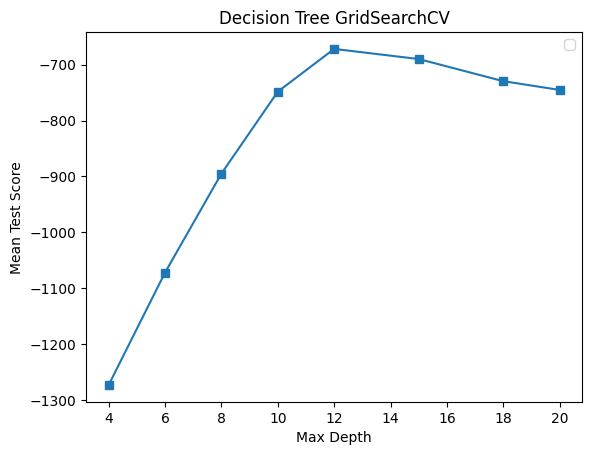

In [15]:
DT_Griddf = pd.DataFrame(DT_Grid.cv_results_)

# create data
Max_depth_x = [4,6,8,10,12,15,18,20]
Mean_score = DT_Griddf['mean_test_score']

#plot graph
plt.plot(Max_depth_x,Mean_score, ls = '-', marker='s')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree GridSearchCV')
plt.legend()

plt.show()

**A max depth of 12 is the highest point for the Mean Test Score.**

**GridSearch using best complexity parameters for the best criterion.**

In [16]:
search_space_decisiontree = {"criterion": ['squared_error', 'friedman_mse', 'absolute_error']}

In [17]:
Decision_Tree = DecisionTreeRegressor(max_depth = 12)

In [18]:
#  Create the grid search object
DT_Grid = GridSearchCV(estimator = Decision_Tree, param_grid = search_space_decisiontree, scoring = 'neg_root_mean_squared_error', cv = cv_sets)

# Fit the grid search object to the data to compute the optimal model
DT_Grid = DT_Grid.fit(X_train, y_train)

In [19]:
DT_Griddf = pd.DataFrame(DT_Grid.cv_results_)

[Text(0.5, 1.0, 'Mean Score by Criterion')]

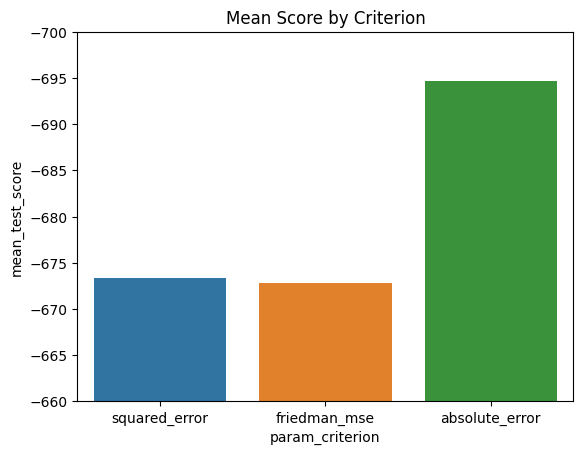

In [20]:
chart = sns.barplot(x = 'param_criterion', y = 'mean_test_score', data = DT_Griddf)
chart.set_ylim(-660,-700)
chart.set(title='Mean Score by Criterion')

**The optimal paramaters for this model are max_depth = 12 and criterion = friedman_mse. Created the final model based on these parameters.**

In [21]:
Decision_Tree = DecisionTreeRegressor(max_depth = 12, criterion='friedman_mse')

In [22]:
Decision_Tree.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=12)

In [23]:
y_pred = Decision_Tree.predict(X_test)

**Compared the r2 score between the train and test datasets. Since the model performance didn't drastically drop with the test data, validated that the model is not overfitted.**

In [24]:
print(Decision_Tree.score(X_train, y_train))

0.982813806621925


In [25]:
print(Decision_Tree.score(X_test, y_test))

0.9705110816536835


**Q-Q Plot based on y_test and y_pred**

Text(0.5, 1.0, 'Q-Q Plot')

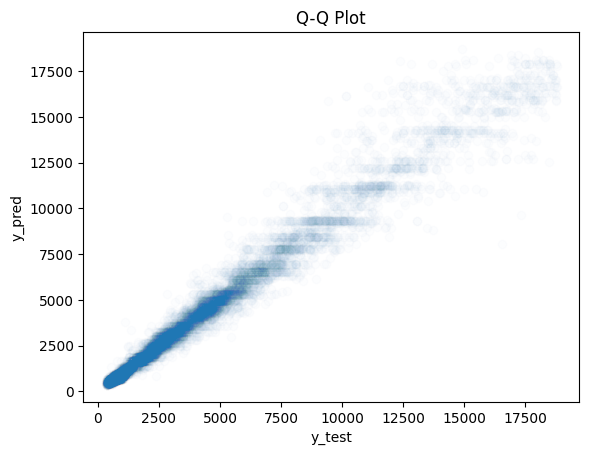

In [26]:
plt.scatter(x = y_test,y = y_pred, alpha = 0.01)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title('Q-Q Plot')

In [27]:
y_diff = y_test - y_pred

count    10781.000000
mean        -3.247621
std        684.468850
min      -6446.508197
25%       -152.183544
50%         -3.538462
75%        154.551724
max       8496.000000
Name: price, dtype: float64

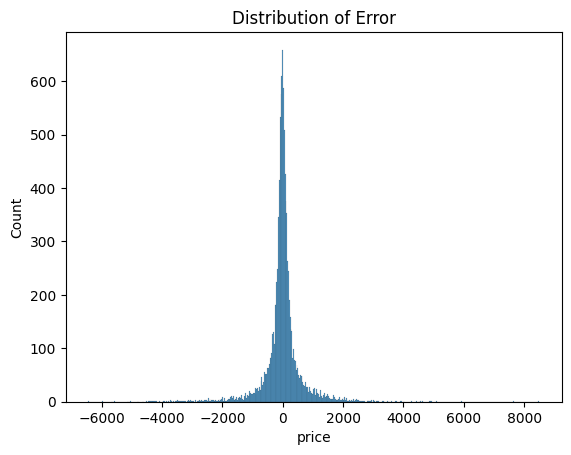

In [28]:
sns.histplot(data=y_diff)
plt.title('Distribution of Error')
y_diff.describe()

# **Final Scores for Model 1a**

In [29]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-Squared:", metrics.r2_score(y_test, y_pred))

Mean Squared Error: 468464.69751295017
Root Mean Squared Error: 684.4448096910007
R-Squared: 0.9705110816536835


# **Feature Importance/Creation of secondary test and train datasets.**

**Chart created to show feature importance**

24


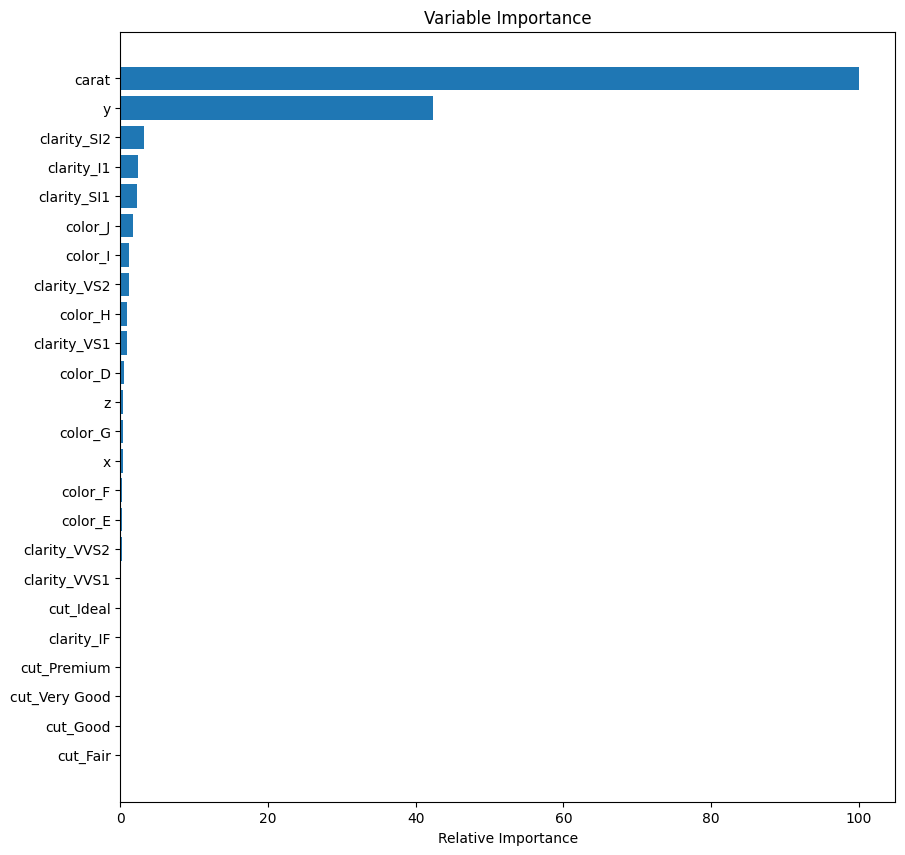

In [30]:
feature_importance = Decision_Tree.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

**As the model is giving feature importance to carat, y, color, and clarity, we will create a secondary dataset which keeps those features and remove all other features. Created a secondary test and train dataset for the important features.**

In [31]:
X_2 = scaled_data.drop(columns = ['cut_Ideal','z','cut_Fair','cut_Good','cut_Premium','cut_Very Good','x','price'])

In [32]:
y_2 = scaled_data['price']

In [33]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, train_size = 0.80, random_state = 2)
print('Training split has ', X_2_train.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(y_2_train))+ ')')
print('Test split has ', X_2_test.shape[0], ' rows\n',
      'and the corresponding labels have an equal number of values.',
      '(' + str(len(y_2_test)) + ')')

Training split has  43122  rows
 and the corresponding labels have an equal number of values. (43122)
Test split has  10781  rows
 and the corresponding labels have an equal number of values. (10781)


# **Model 1b: Decision Tree Regressor based on feature importance**

**As the model is giving feature importance to carat, y, color, and clarity, similar to the previous model, we will create another model using the updated test/train data sets from the previous model.**

**Grid Search with complexity parameters**

In [34]:
search_space_decisiontree = {"max_depth": [4,6,8,10,12,15,18,20]}

In [35]:
Decision_Tree = DecisionTreeRegressor()

In [36]:
#  Create the grid search object
DT_Grid = GridSearchCV(estimator = Decision_Tree, param_grid = search_space_decisiontree, scoring = 'neg_root_mean_squared_error', cv = cv_sets)

# Fit the grid search object to the data to compute the optimal model
DT_Grid = DT_Grid.fit(X_2_train, y_2_train)

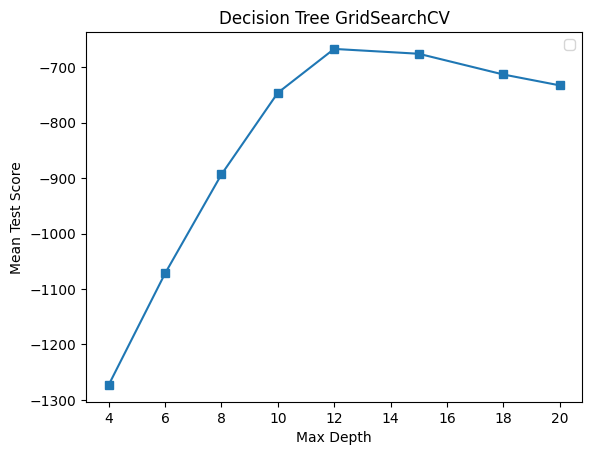

In [37]:
DT_Griddf = pd.DataFrame(DT_Grid.cv_results_)

# create data
Max_depth_x = [4,6,8,10,12,15,18,20]
Mean_score = DT_Griddf['mean_test_score']

#plot graph
plt.plot(Max_depth_x,Mean_score, ls = '-', marker='s')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Decision Tree GridSearchCV')
plt.legend()

plt.show()

**A max depth of 12 is the highest point for the Mean Test Score.**

**GridSearch using best complexity parameters for the best criterion.**

In [158]:
search_space_decisiontree = {"criterion": ['squared_error', 'friedman_mse', 'absolute_error']}

In [159]:
Decision_Tree = DecisionTreeRegressor(max_depth = 12)

In [160]:
#  Create the grid search object
DT_Grid = GridSearchCV(estimator = Decision_Tree, param_grid = search_space_decisiontree, scoring = 'neg_root_mean_squared_error', cv = cv_sets)

# Fit the grid search object to the data to compute the optimal model
DT_Grid = DT_Grid.fit(X_2_train, y_2_train)

In [161]:
DT_Griddf = pd.DataFrame(DT_Grid.cv_results_)

[Text(0.5, 1.0, 'Mean Score by Criterion')]

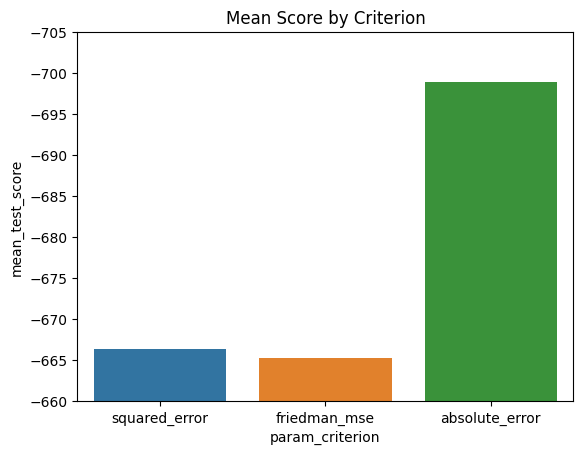

In [162]:
chart = sns.barplot(x = 'param_criterion', y = 'mean_test_score', data = DT_Griddf)
chart.set_ylim(-660, -705)
chart.set(title='Mean Score by Criterion')

**The optimal paramaters for this model are max_depth = 12 and criterion = friedman_mse. Created the final model based on these parameters.**

In [163]:
Decision_Tree = DecisionTreeRegressor(max_depth = 12, criterion='friedman_mse')

In [164]:
Decision_Tree.fit(X_2_train,y_2_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=12)

In [165]:
y_2_pred = Decision_Tree.predict(X_2_test)

**Compared the r2 score between the train and test datasets. Since the model performance didn't drastically drop with the test data, validated that the model is not overfitted.**

In [166]:
print(Decision_Tree.score(X_2_train, y_2_train))

0.9818666809122184


In [167]:
print(Decision_Tree.score(X_2_test, y_2_test))

0.970449488127431


**Q-Q Plot based on y_2_test and y_2_pred**

Text(0.5, 1.0, 'Q-Q Plot')

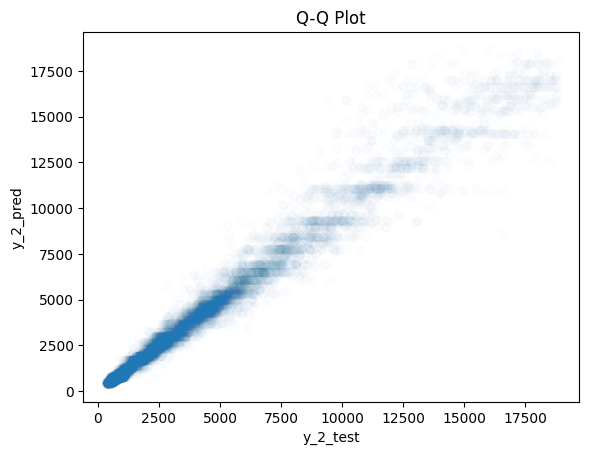

In [168]:
plt.scatter(x = y_2_test,y = y_2_pred, alpha = 0.01)
plt.xlabel("y_2_test")
plt.ylabel("y_2_pred")
plt.title('Q-Q Plot')

In [169]:
y_2_diff = y_2_test - y_2_pred

count    10781.000000
mean        -1.850451
std        685.188517
min      -6446.508197
25%       -145.504016
50%         -6.125000
75%        161.100000
max       7870.000000
Name: price, dtype: float64

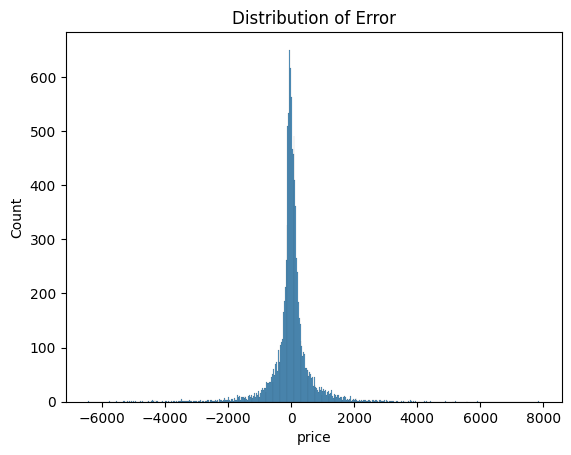

In [170]:
sns.histplot(data=y_2_diff)
plt.title('Distribution of Error')
y_2_diff.describe()

# **Final Scores for Model 1b:**

In [171]:
print('Mean Squared Error:',metrics.mean_squared_error(y_2_test, y_2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_2_test, y_2_pred)))
print("R-Squared:", metrics.r2_score(y_2_test, y_2_pred))

Mean Squared Error: 469443.180084124
Root Mean Squared Error: 685.1592370275132
R-Squared: 0.970449488127431


# **Model 2a: Random Forest Regressor - All Features**

***Model Advantages:***

*   Same Advantages as Decision Tree.
*   Reduces overfitting of a single Decision Tree.

***Model Disadvantages:***

*   Requires increased training time and computational power.

***Scoring Method Used:***

*   R-Squared
*   Mean Squared Error
*   Root Mean Squared Error

***Hyperparameters Considered:***

*   max_depth
*   n_estimators
*   criterion



**Grid Search with complexity parameters**

In [52]:
search_space_randomforest = {"max_depth": [4,6,8,10,12,15,18,20], "n_estimators": [5,10,15,25]}

In [53]:
Random_Forest = RandomForestRegressor()

In [54]:
RF_Grid = GridSearchCV(estimator = Random_Forest, param_grid = search_space_randomforest, scoring = 'neg_root_mean_squared_error', cv = cv_sets)

In [55]:
RF_Grid = RF_Grid.fit(X_train,y_train)

In [56]:
RF_Griddf = pd.DataFrame(RF_Grid.cv_results_)

**Chart for max_depth**

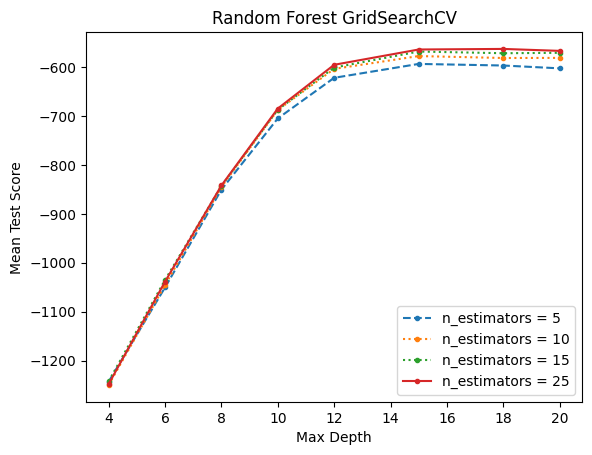

In [57]:
#Turn results into dataframe
RF_Griddf = pd.DataFrame(RF_Grid.cv_results_)

# create data
Max_depth_x = [4,6,8,10,12,15,18,20]
Mean_score_5 = RF_Griddf[RF_Griddf["param_n_estimators"] == 5]['mean_test_score']
Mean_score_10 = RF_Griddf[RF_Griddf["param_n_estimators"] == 10]['mean_test_score']
Mean_score_15 = RF_Griddf[RF_Griddf["param_n_estimators"] == 15]['mean_test_score']
Mean_score_25 = RF_Griddf[RF_Griddf["param_n_estimators"] == 25]['mean_test_score']

#plot graph
plt.plot(Max_depth_x,Mean_score_5, label = "n_estimators = 5", ls = '--', marker='.')
plt.plot(Max_depth_x,Mean_score_10, label = "n_estimators = 10", ls = ':', marker='.')
plt.plot(Max_depth_x,Mean_score_15, label = "n_estimators = 15", ls = ':', marker='.')
plt.plot(Max_depth_x,Mean_score_25, label = "n_estimators = 25", ls = '-', marker='.')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Random Forest GridSearchCV')
plt.legend()

plt.show()

**A max depth of 12 appears to be the elbow point for the Mean Test Score. Additionally since all the n_estimators have results that are very similar, I chose an n_estimator of 5 to make the model less complex.**

**GridSearch using best complexity parameters for the best criterion.**

In [58]:
search_space_randomforest = {"criterion": ['squared_error','friedman_mse','absolute_error']}

In [59]:
Random_Forest = RandomForestRegressor(max_depth= 12, n_estimators= 5)

In [60]:
RF_Grid = GridSearchCV(estimator = Random_Forest, param_grid = search_space_randomforest, scoring = 'neg_root_mean_squared_error', cv = cv_sets)

In [61]:
RF_Grid = RF_Grid.fit(X_train,y_train)

In [62]:
RF_Griddf = pd.DataFrame(RF_Grid.cv_results_)

[Text(0.5, 1.0, 'Mean Score by Criterion')]

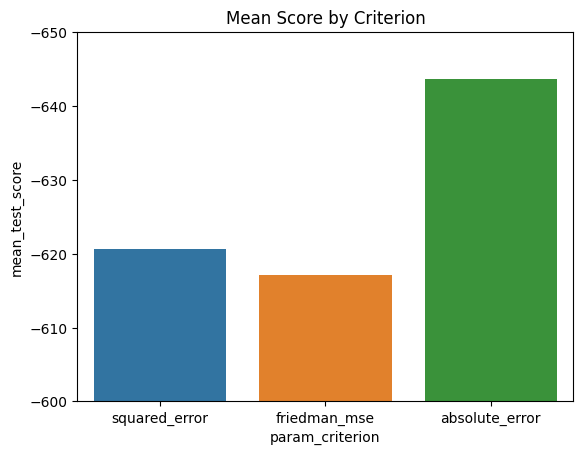

In [63]:
chart = sns.barplot(x = 'param_criterion', y = 'mean_test_score', data = RF_Griddf)
chart.set_ylim(-600, -650)
chart.set(title='Mean Score by Criterion')

**The optimal paramaters for this model are max_depth = 12, n_estimators = 5, and criterion = friedman_mse.**

**Created the final model based on these parameters:**

---



In [64]:
Random_Forest = RandomForestRegressor(max_depth= 12, n_estimators= 5, criterion='friedman_mse')

In [65]:
Random_Forest.fit(X_train,y_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=12, n_estimators=5)

In [66]:
y_pred = Random_Forest.predict(X_test)

**Compared the r2 score between the train and test datasets. Since the model performance didn't drastically drop with the test data, validated that the model is not overfitted.**

In [67]:
print(Random_Forest.score(X_train, y_train))

0.9837242636559409


In [68]:
print(Random_Forest.score(X_test, y_test))

0.9744586136263181


**Q-Q Plot based on y_test and y_pred**

Text(0.5, 1.0, 'Q-Q Plot')

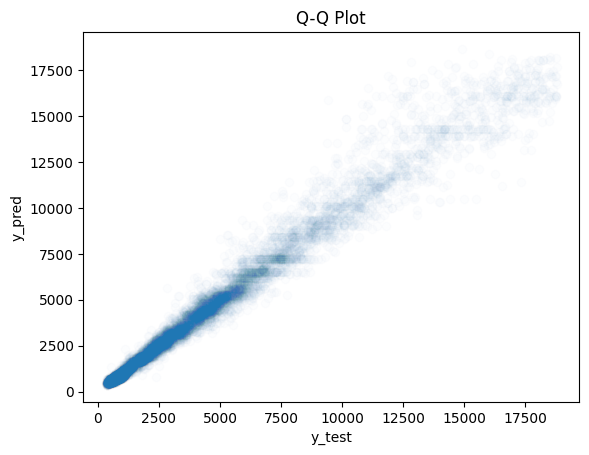

In [69]:
plt.scatter(x = y_test,y = y_pred, alpha = 0.01)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.title('Q-Q Plot')

In [70]:
y_diff = y_test - y_pred

count    10781.000000
mean        -6.710567
std        636.982188
min      -6453.661842
25%       -137.027804
50%         -5.684642
75%        140.015634
max       5902.827546
Name: price, dtype: float64

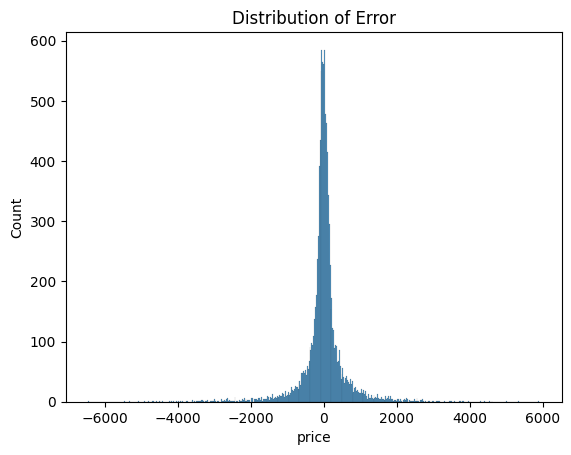

In [71]:
sns.histplot(data=y_diff)
plt.title('Distribution of Error')
y_diff.describe()

# **Final Scores for Model 2a:**

In [72]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-Squared:", metrics.r2_score(y_test, y_pred))

Mean Squared Error: 405753.7038520396
Root Mean Squared Error: 636.9879934912742
R-Squared: 0.9744586136263181


# **Model 2b: Random Forest Regressor based on feature importance**

**Grid Search with complexity parameters**

In [73]:
search_space_randomforest = {"max_depth": [4,6,8,10,12,15,18,20], "n_estimators": [5,10,15,25]}

In [74]:
Random_Forest = RandomForestRegressor()

In [75]:
RF_Grid = GridSearchCV(estimator = Random_Forest, param_grid = search_space_randomforest, scoring = 'neg_root_mean_squared_error', cv = cv_sets)

In [76]:
RF_Grid = RF_Grid.fit(X_2_train,y_2_train)

**Chart for max_depth**

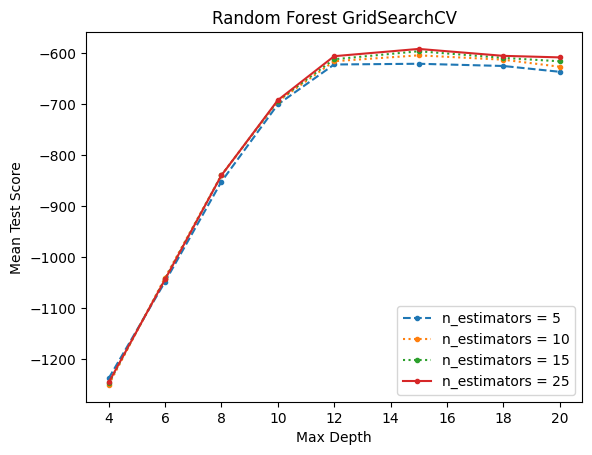

In [77]:
#Turn results into dataframe
RF_Griddf = pd.DataFrame(RF_Grid.cv_results_)

# create data
Max_depth_x = [4,6,8,10,12,15,18,20]
Mean_score_5 = RF_Griddf[RF_Griddf["param_n_estimators"] == 5]['mean_test_score']
Mean_score_10 = RF_Griddf[RF_Griddf["param_n_estimators"] == 10]['mean_test_score']
Mean_score_15 = RF_Griddf[RF_Griddf["param_n_estimators"] == 15]['mean_test_score']
Mean_score_25 = RF_Griddf[RF_Griddf["param_n_estimators"] == 25]['mean_test_score']

#plot graph
plt.plot(Max_depth_x,Mean_score_5, label = "n_estimators = 5", ls = '--', marker='.')
plt.plot(Max_depth_x,Mean_score_10, label = "n_estimators = 10", ls = ':', marker='.')
plt.plot(Max_depth_x,Mean_score_15, label = "n_estimators = 15", ls = ':', marker='.')
plt.plot(Max_depth_x,Mean_score_25, label = "n_estimators = 25", ls = '-', marker='.')

plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.title('Random Forest GridSearchCV')
plt.legend()

plt.show()

**A max depth of 12 appears to be the elbow point for the Mean Test Score. Additionally since all the n_estimators have results that are very similar, I cose an n_estimator of 5 to make the model less complex.**

**GridSearch using best complexity parameters for the best criterion.**

In [78]:
search_space_randomforest = {"criterion": ['squared_error','friedman_mse','absolute_error']}

In [79]:
Random_Forest = RandomForestRegressor(max_depth= 12, n_estimators= 5)

In [80]:
RF_Grid = GridSearchCV(estimator = Random_Forest, param_grid = search_space_randomforest, scoring = 'neg_root_mean_squared_error', cv = cv_sets)

In [81]:
RF_Grid = RF_Grid.fit(X_2_train,y_2_train)

In [82]:
RF_Griddf = pd.DataFrame(RF_Grid.cv_results_)

[Text(0.5, 1.0, 'Mean Score by Criterion')]

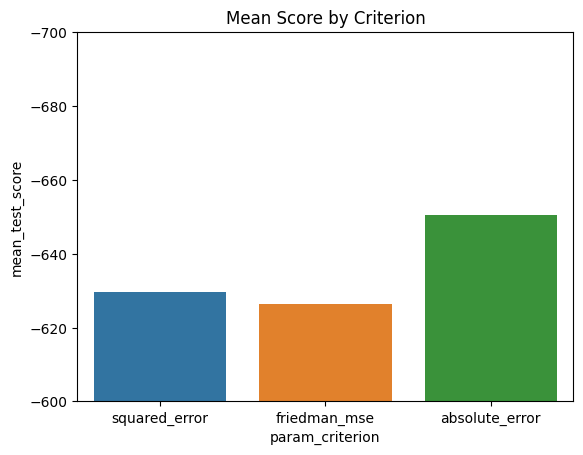

In [83]:
chart = sns.barplot(x = 'param_criterion', y = 'mean_test_score', data = RF_Griddf)
chart.set_ylim(-600,-700)
chart.set(title='Mean Score by Criterion')

**The optimal paramaters for this model are max_depth = 12, n_estimators = 5, and criterion = friedman_mse. Created the final model based on these parameters.**

In [134]:
Random_Forest = RandomForestRegressor(max_depth= 12, n_estimators= 5, criterion='friedman_mse')

In [135]:
Random_Forest.fit(X_2_train,y_2_train)

RandomForestRegressor(criterion='friedman_mse', max_depth=12, n_estimators=5)

In [136]:
y_2_pred = Random_Forest.predict(X_2_test)

**Compared the r2 score between the train and test datasets. Since the model performance didn't drastically drop with the test data, validated that the model is not overfitted.**

In [137]:
print(Random_Forest.score(X_2_train, y_2_train))

0.9824811926949156


In [138]:
print(Random_Forest.score(X_2_test, y_2_test))

0.9732191952732997


**Q-Q Plot based on y_2_test and y_2_pred**

Text(0.5, 1.0, 'Q-Q Plot')

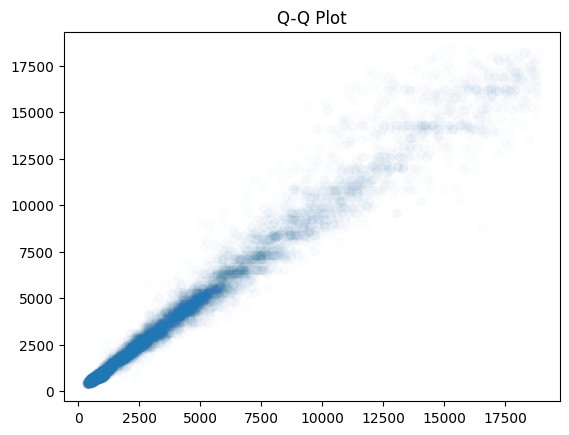

In [139]:
plt.scatter(y_2_test,y_2_pred, alpha = 0.01)
plt.title('Q-Q Plot')

In [140]:
y_2_diff = y_2_test - y_2_pred

count    10781.000000
mean        -4.029598
std        652.277922
min      -5906.982638
25%       -133.852211
50%         -9.419288
75%        147.573947
max       7683.857143
Name: price, dtype: float64

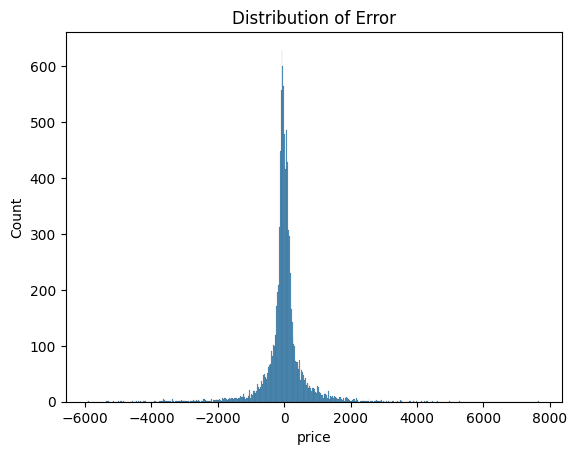

In [141]:
sns.histplot(data=y_2_diff)
plt.title('Distribution of Error')
y_2_diff.describe()

# **Final Scores for Model 2b:**

In [142]:
print('Mean Squared Error:',metrics.mean_squared_error(y_2_test, y_2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_2_test, y_2_pred)))
print("R-Squared:", metrics.r2_score(y_2_test, y_2_pred))

Mean Squared Error: 425443.26102805894
Root Mean Squared Error: 652.2601176126431
R-Squared: 0.9732191952732997


# **Model 3a: Nearest Neighbors Regression**

***Model Advantages:***

*   Simple to understand and implement.
*   Can be used for classification and regression.
*   Has no statistical assumptions.

***Model Disadvantages:***

*   This is a slow algorithm.
*   Requires features to be scaled.
*   Very sensitive to outliers.

***Scoring Method Used:***

*   R-Squared
*   Mean Squared Error
*   Root Mean Squared Error

***Hyperparameters Considered:***

*   n_neighbors
*   p
*   algorithm


**Grid Search with complexity parameters**

In [93]:
search_space_nearestneighbors = {"n_neighbors": [1,2,4,6,8,10,12,14], "p": [1,2]}

In [94]:
Nearest_Neighbors = KNeighborsRegressor()

In [95]:
NN_Grid = GridSearchCV(estimator = Nearest_Neighbors, param_grid = search_space_nearestneighbors, scoring = 'neg_root_mean_squared_error', cv = cv_sets)

In [96]:
NN_Grid = NN_Grid.fit(X_train,y_train)

**Chart for n_neighbors**

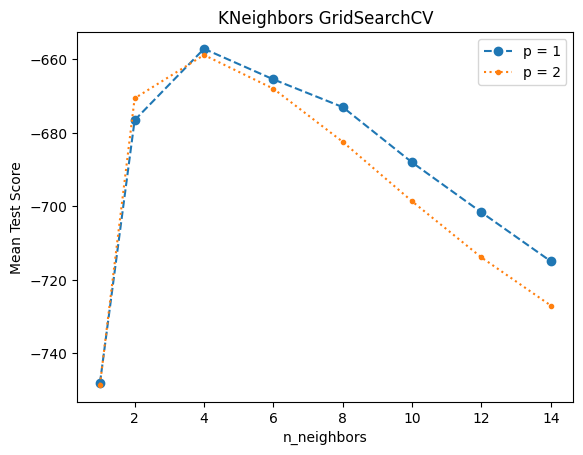

In [97]:
#Turn results into dataframe
NN_Griddf = pd.DataFrame(NN_Grid.cv_results_)

# create data
n_neighbors_x = [1,2,4,6,8,10,12,14]
P_1 = NN_Griddf[NN_Griddf["param_p"] == 1]['mean_test_score']
P_2 = NN_Griddf[NN_Griddf["param_p"] == 2]['mean_test_score']


#plot graph
plt.plot(n_neighbors_x,P_1, label = "p = 1", ls = '--', marker='o')
plt.plot(n_neighbors_x,P_2, label = "p = 2", ls = ':', marker='.')


plt.xlabel('n_neighbors')
plt.ylabel('Mean Test Score')
plt.title('KNeighbors GridSearchCV')
plt.legend()

plt.show()

**I chose a p value of 1 and n_neighbors of 4 for this model.**

**GridSearch using best complexity parameters for the best criterion.**

In [98]:
search_space_NN = {"algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [99]:
Nearest_Neighbors = KNeighborsRegressor(p = 1, n_neighbors=4)

In [100]:
NN_Grid = GridSearchCV(estimator = Nearest_Neighbors, param_grid = search_space_NN, scoring = 'neg_root_mean_squared_error', cv = cv_sets)

In [101]:
NN_Grid = NN_Grid.fit(X_train,y_train)

In [102]:
NN_Griddf = pd.DataFrame(NN_Grid.cv_results_)

[Text(0.5, 1.0, 'Mean Score by Criterion')]

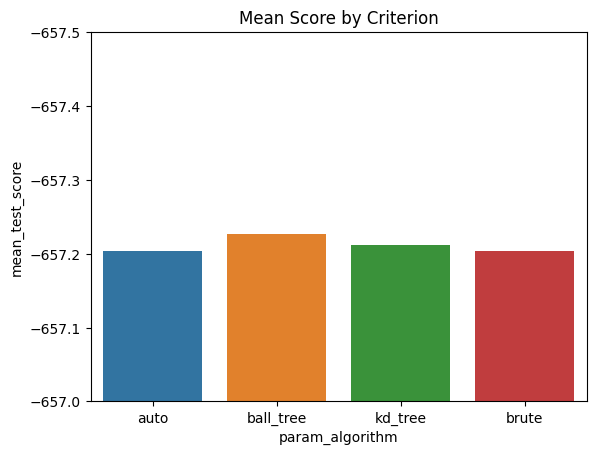

In [103]:
chart = sns.barplot(x = 'param_algorithm', y = 'mean_test_score', data = NN_Griddf)
chart.set_ylim(-657, -657.5)
chart.set(title='Mean Score by Criterion')

**I chose 'auto' for the algorithm, p value of 1 and n_neighbors of 5.**

In [143]:
Nearest_Neighbors = KNeighborsRegressor(algorithm = 'auto', p = 1, n_neighbors=5)

In [144]:
Nearest_Neighbors.fit(X_train,y_train)

KNeighborsRegressor(p=1)

In [145]:
y_pred = Nearest_Neighbors.predict(X_test)

**Compared the r2 score between the train and test datasets. Since the model performance didn't drastically drop with the test data, validated that the model is not overfitted.**

In [146]:
print(Nearest_Neighbors.score(X_train, y_train))

0.9842214148904357


In [147]:
print(Nearest_Neighbors.score(X_test, y_test))

0.9735492435730992


**Q-Q Plot based on y_test and y_pred**

Text(0.5, 1.0, 'Q-Q Plot')

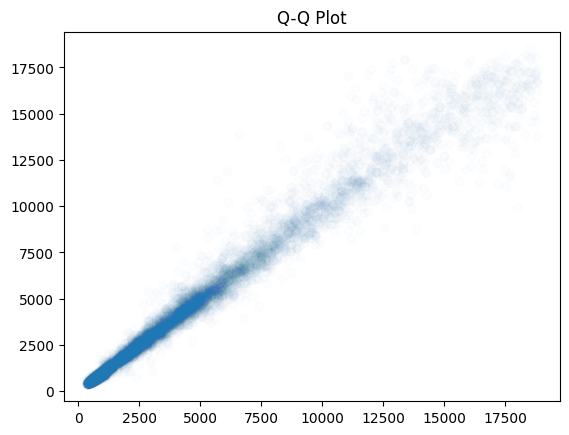

In [148]:
plt.scatter(y_test,y_pred, alpha = 0.01)
plt.title('Q-Q Plot')

In [150]:
y_diff = y_test - y_pred

count    10781.000000
mean        -3.552416
std        648.248741
min      -7315.000000
25%       -122.000000
50%          0.400000
75%        117.200000
max       8020.000000
Name: price, dtype: float64

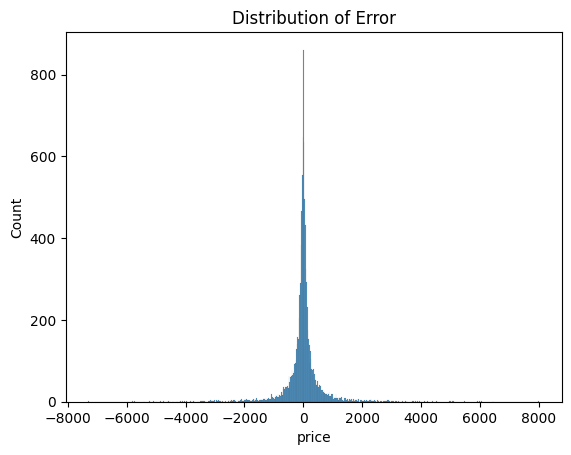

In [149]:
sns.histplot(data=y_diff)
plt.title('Distribution of Error')
y_diff.describe()

# **Final Scores for Model 3a:**

In [151]:
print('Mean Squared Error:',metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R-Squared:", metrics.r2_score(y_test, y_pred))

Mean Squared Error: 420200.071870884
Root Mean Squared Error: 648.2284102620649
R-Squared: 0.9735492435730992


# **Model 3b: Nearest Neighbors Regression - Including only important features**

**Grid Search with complexity parameters**

In [113]:
search_space_nearestneighbors = {"n_neighbors": [1,2,4,6,8,10,12,14], "p": [1,2]}

In [114]:
Nearest_Neighbors = KNeighborsRegressor()

In [115]:
NN_Grid = GridSearchCV(estimator = Nearest_Neighbors, param_grid = search_space_nearestneighbors, scoring = 'neg_root_mean_squared_error', cv = cv_sets)

In [116]:
NN_Grid = NN_Grid.fit(X_2_train,y_2_train)

**Chart for n_neighbors**

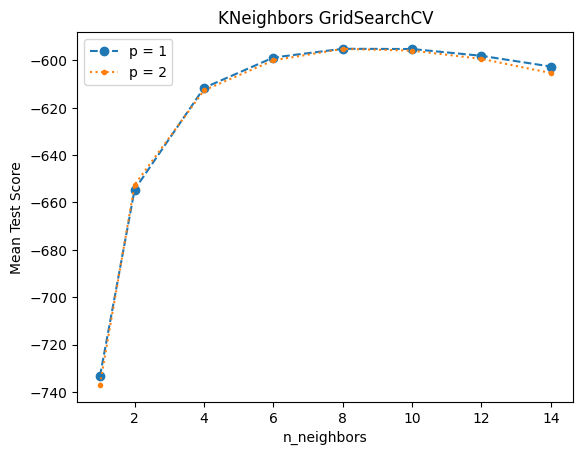

In [117]:
#Turn results into dataframe
NN_Griddf = pd.DataFrame(NN_Grid.cv_results_)

# create data
n_neighbors_x = [1,2,4,6,8,10,12,14]
P_1 = NN_Griddf[NN_Griddf["param_p"] == 1]['mean_test_score']
P_2 = NN_Griddf[NN_Griddf["param_p"] == 2]['mean_test_score']


#plot graph
plt.plot(n_neighbors_x,P_1, label = "p = 1", ls = '--', marker='o')
plt.plot(n_neighbors_x,P_2, label = "p = 2", ls = ':', marker='.')


plt.xlabel('n_neighbors')
plt.ylabel('Mean Test Score')
plt.title('KNeighbors GridSearchCV')
plt.legend()

plt.show()

**I chose a p value of 1 and n_neighbors of 4.**

**GridSearch using best complexity parameters for the best criterion.**

In [152]:
search_space_NN = {"algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute']}

In [153]:
Nearest_Neighbors = KNeighborsRegressor(p = 1, n_neighbors=4)

In [154]:
NN_Grid = GridSearchCV(estimator = Nearest_Neighbors, param_grid = search_space_NN, scoring = 'neg_root_mean_squared_error', cv = cv_sets)

In [155]:
NN_Grid = NN_Grid.fit(X_2_train,y_2_train)

In [156]:
NN_Griddf = pd.DataFrame(NN_Grid.cv_results_)

[Text(0.5, 1.0, 'Mean Score by Criterion')]

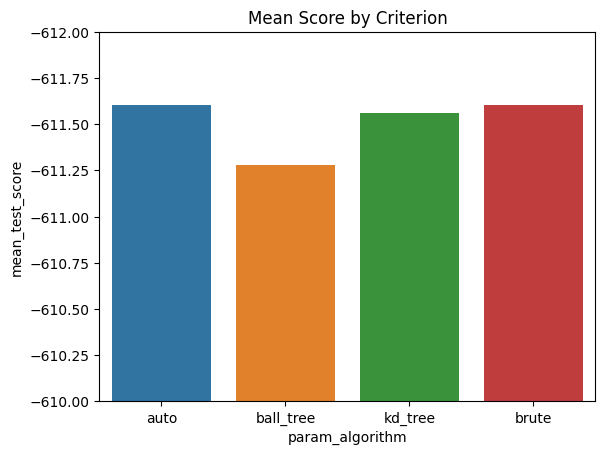

In [157]:
chart = sns.barplot(x = 'param_algorithm', y = 'mean_test_score', data = NN_Griddf)
chart.set_ylim(-610, -612)
chart.set(title='Mean Score by Criterion')

**I chose the ball_tree algorithm, a p value of 1 and n_neighbors of 5.**

In [124]:
Nearest_Neighbors = KNeighborsRegressor(algorithm = 'ball_tree', p = 1, n_neighbors=5)

In [125]:
Nearest_Neighbors.fit(X_2_train,y_2_train)

KNeighborsRegressor(algorithm='ball_tree', p=1)

In [126]:
y_2_pred = Nearest_Neighbors.predict(X_2_test)

**Compared the r2 score between the train and test datasets. Since the model performance didn't drastically drop with the test data, validated that the model is not overfitted.**

In [127]:
print(Nearest_Neighbors.score(X_2_train, y_2_train))

0.9857133315587991


In [128]:
print(Nearest_Neighbors.score(X_2_test, y_2_test))

0.9769626423425161


**Q-Q Plot based on y_2_test and y_2_pred**

Text(0.5, 1.0, 'Q-Q Plot')

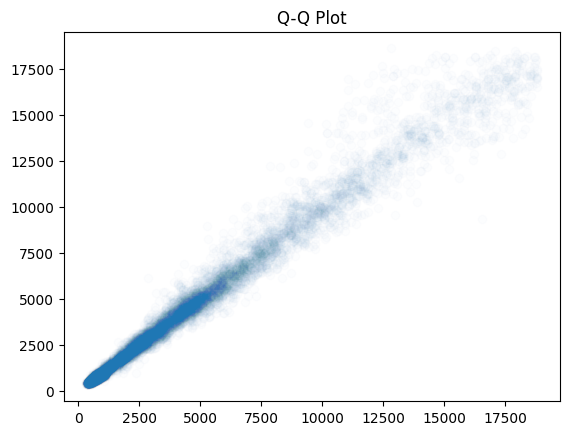

In [129]:
plt.scatter(y_2_test,y_2_pred, alpha = 0.01)
plt.title('Q-Q Plot')

In [130]:
y_2_diff = y_2_test - y_2_pred

count    10781.000000
mean       -16.895334
std        604.750243
min      -5901.800000
25%       -134.000000
50%         -6.800000
75%        131.800000
max       7225.000000
Name: price, dtype: float64

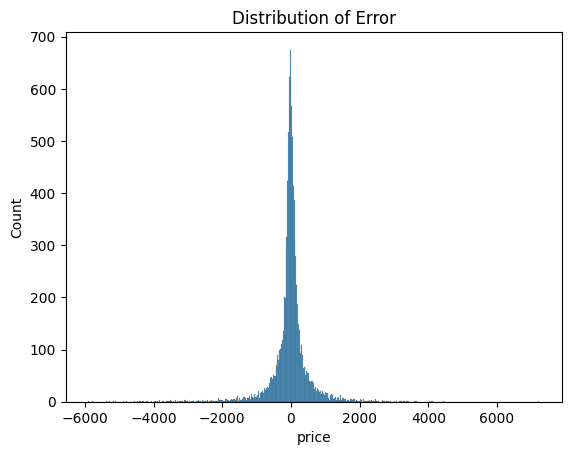

In [131]:
sns.histplot(data=y_2_diff)
plt.title('Distribution of Error')
y_2_diff.describe()

# **Final Scores for Model 3b:**

In [132]:
print('Mean Squared Error:',metrics.mean_squared_error(y_2_test, y_2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_2_test, y_2_pred)))
print("R-Squared:", metrics.r2_score(y_2_test, y_2_pred))

Mean Squared Error: 365974.38603098044
Root Mean Squared Error: 604.958168827383
R-Squared: 0.9769626423425161
